In [1]:
from google.colab import drive

In [10]:
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
!ls "/content/drive/My Drive/Plant_Disease/Collab Code/Data/Plant_images_pianalytix/Potato___Early_blight"

'Corn_(maize)___Common_rust_'   Potato___Early_blight   Tomato___Bacterial_spot


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from sklearn.preprocessing import label_binarize, LabelBinarizer
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
from keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

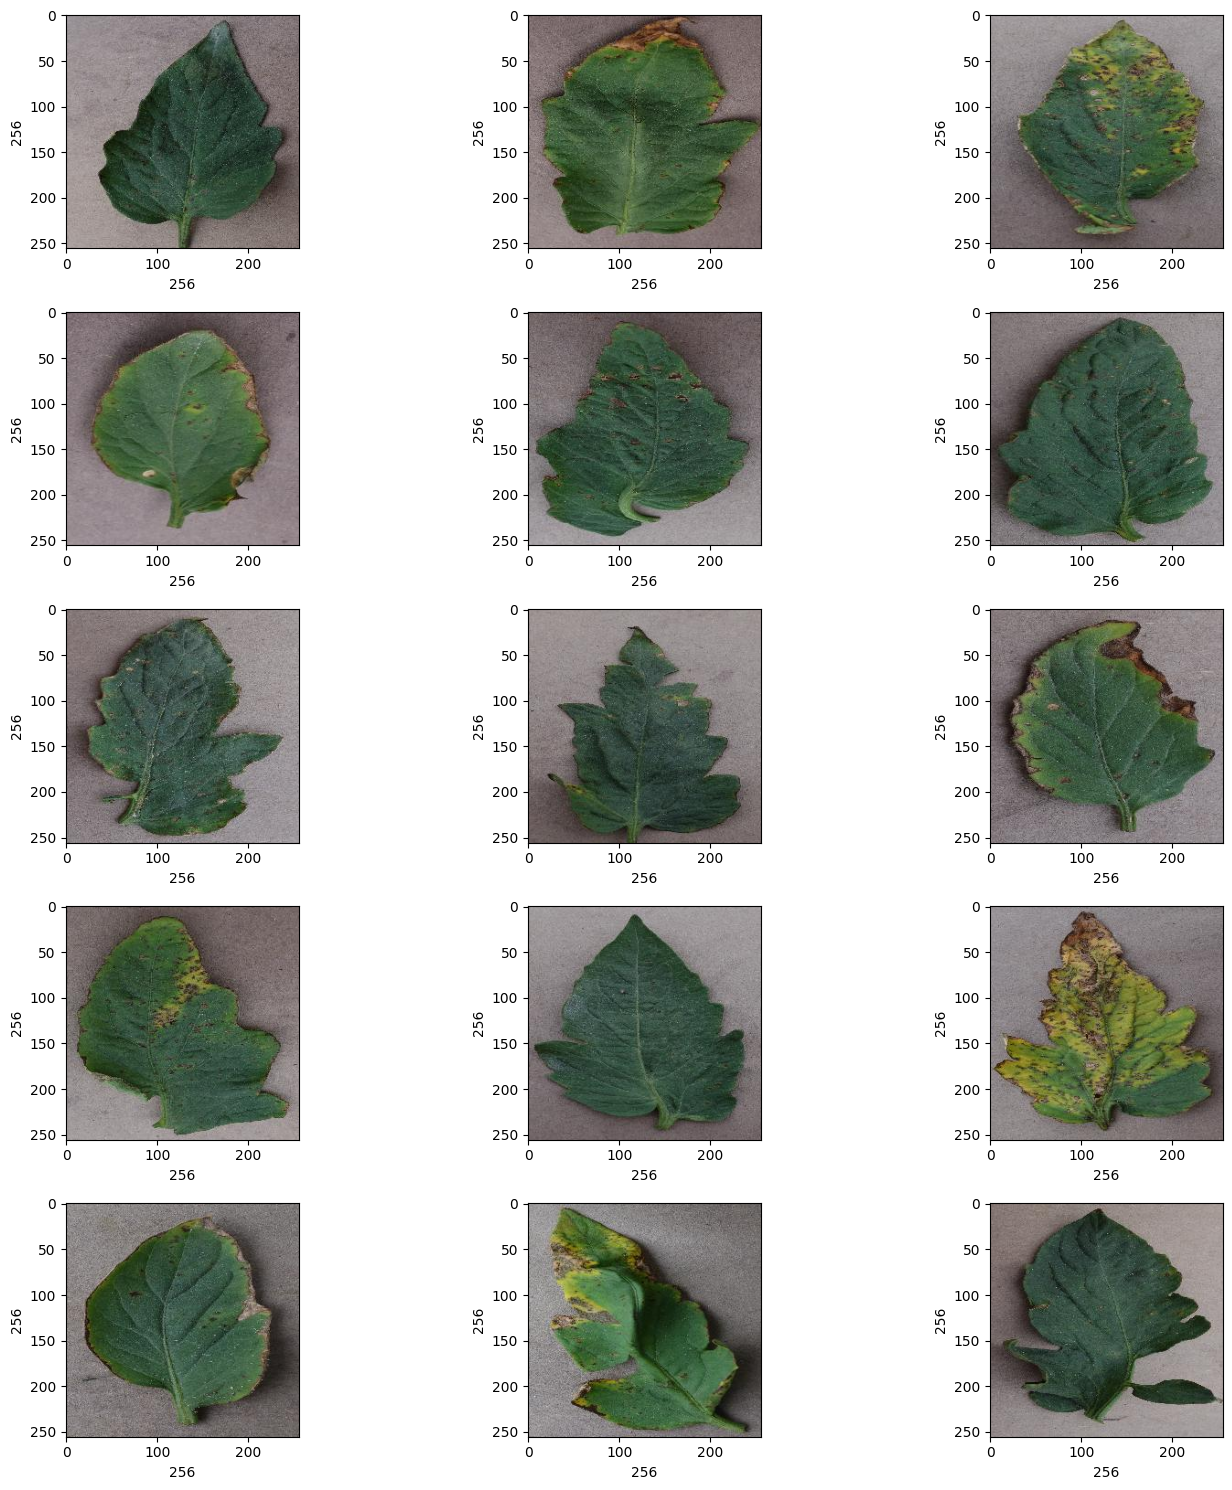

In [13]:
path = "/content/drive/My Drive/Plant_Disease/Collab Code/Data/Plant_images_pianalytix/Tomato___Bacterial_spot"
#plotting 12 images randomly from the dataset Tomato__Bacterial_spot
plt.figure(figsize=(15,15)) #defining the figure size
for i in range(1,16):
  plt.subplot(5,3,i) #picking out a particular subplot from the figure
  plt.tight_layout()
  random_image = imread(path + '/' + random.choice(sorted(os.listdir(path))))#picking an image ramdomly from the
  plt.imshow(random_image)
  plt.xlabel(random_image.shape[1], fontsize = 10) #image width displayed in the x axis
  plt.ylabel(random_image.shape[0], fontsize = 10) #image height displayed on the y axis

In [14]:
#Converting the images to arrays

def conv_img_to_array(img_path):
  try:
    img = cv2.imread(img_path)
    if img is not None:
      img = cv2.resize(img, (256,256))
      return img_to_array(img)
    else:
      return np.array([])
  except Exception as e:
    print(f"Error : {e}")
    return None

In [15]:
dir = "/content/drive/My Drive/Plant_Disease/Collab Code/Data/Plant_images_pianalytix"
root_dir = listdir(dir)
image_list, label_list = [], []
all_labels = ['Corn-Common_rust', 'Potato-Early_blight', 'Tomato-Bacterial_spot']
binary_labels = [0,1,2]
count = 0

#Reading the images and converting them to numpy arrays
#then storing them in a list in parallel with the labels(the particular folder the image is in) which is stored in another list
for directory in root_dir:
  plant_image_list = listdir(f"{dir}/{directory}")
  for  file in plant_image_list:
    image_path = f"{dir}/{directory}/{file}"
    image_list.append(conv_img_to_array(image_path))
    label_list.append(binary_labels[count])
  count += 1

In [16]:
#Visualizing the number of classes
label_counts = pd.DataFrame(label_list).value_counts()
label_counts.head()

,count
0,
0,300
1,300
2,300


In [17]:
#classes are balanced

#now checking the shape of an image
image_list[0].shape

(256, 256, 3)

In [32]:
#split data into test and training set

X_train, X_test, y_train, y_test = train_test_split(image_list, label_list, test_size = 0.2, random_state = 0)

In [33]:
#Normalize image data
X_train = np.array(X_train, dtype = np.float16)/225.0
X_test = np.array(X_test, dtype = np.float16)/225.0
X_train = X_train.reshape(-1, 256, 256, 3)
X_test = X_test.reshape(-1, 256, 256, 3)

In [34]:
#one hot encode label data
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [35]:
#Build the CNN architecture
model = Sequential()
model.add(Conv2D(32, (3,3), padding = "same", input_shape = (256,256,3), activation = "relu"))
model.add(MaxPooling2D(pool_size = (3,3)))
model.add(Conv2D(64, (3,3), padding = "same", activation = "relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten()) #flatten before dense layer
model.add(Dense(64, activation = "relu"))
model.add(Dense(3, activation = "softmax")) #three neurons because there are three classes
model.summary() #output the summary of the architecture

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 256, 256, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 85, 85, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 85, 85, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 42, 42, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 112896)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │       7,225,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,244,995 (27.64 MB)

 Trainable params: 7,244,995 (27.64 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
#compile the model
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.001), metrics = ['accuracy'])

In [37]:
#split the train data into training and validation sets
x_train, x_val, y_train, y_vali = train_test_split(X_train,y_train, test_size = 0.2)

In [28]:
#Define Earlystopping callback
early_stopping = EarlyStopping(monitor = 'val_accuracy', patience = 7, restore_best_weights = True, verbose = 1) #this will enable the model to stop training after val_loss doesnt gget better for 7 epochs

In [38]:
#Train the model
epochs = 50
batch_size = 128
history = model.fit(x_train,y_train, batch_size = batch_size, epochs = epochs, callbacks = [early_stopping], validation_data = (x_val,y_vali))

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 48s 9s/step - accuracy: 0.3930 - loss: 2.1762 - val_accuracy: 0.6042 - val_loss: 0.6214
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 80s 9s/step - accuracy: 0.6454 - loss: 0.5580 - val_accuracy: 0.6319 - val_loss: 0.4998
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 83s 9s/step - accuracy: 0.8251 - loss: 0.3792 - val_accuracy: 0.9097 - val_loss: 0.3606
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 81s 9s/step - accuracy: 0.9555 - loss: 0.2289 - val_accuracy: 0.9167 - val_loss: 0.1995
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 45s 9s/step - accuracy: 0.9654 - loss: 0.0991 - val_accuracy: 0.9306 - val_loss: 0.1691
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 45s 9s/step - accuracy: 0.9712 - loss: 0.0684 - val_accuracy: 0.9514 - val_loss: 0.1354
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 81s 9s/step - accuracy: 0.9814 - loss: 0.0478 - val_accuracy: 0.9931 - val_loss: 0.0897
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 55s 12s/step - accuracy: 0.9900 - loss: 0.0305 - val_accuracy: 0.9792 - val_loss: 0.1055
Epoch 9

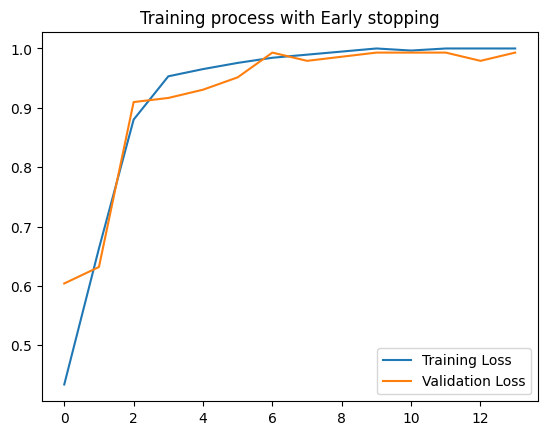

In [41]:
#visualizing the training process
plt.plot(history.history['accuracy'], label = "Training Loss")
plt.plot(history.history['val_accuracy'], label = "Validation Loss")
plt.legend()
plt.title("Training process with Early stopping")
plt.show()

In [40]:
model.save('/content/drive/MyDrive/plant_model_latest.h5')

In [42]:
#Evaluating the model using the accuracy metric
scores = model.evaluate(X_test, y_test)
print(f"Test accuracy is : {scores[1]*100}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 870ms/step - accuracy: 0.9857 - loss: 0.0359
Test accurac is : 98.88888597488403


6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 957ms/step


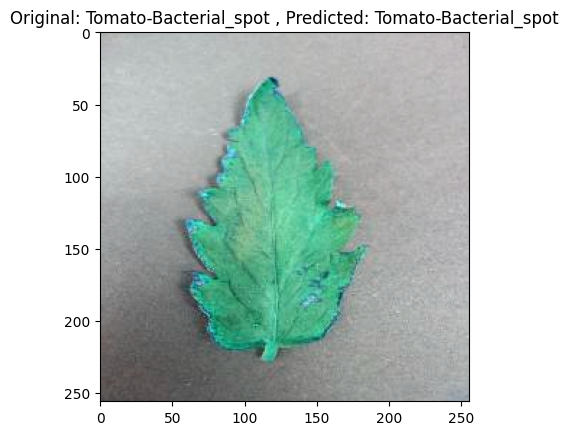

In [44]:
#predict the test set
y_pred = model.predict(X_test)
orig = all_labels[np.argmax(y_test[10])]
pred = all_labels[np.argmax(y_pred[10])]
img = array_to_img(X_test[10])
plt.title(f"Original: {orig} , Predicted: {pred}")
plt.imshow(img)


In [ ]:
#HEHEHHEHEHHEHE
